In [1]:
import torch
from transformers import BartForConditionalGeneration, BartTokenizer
from datasets import load_dataset
import numpy as np
# Print the length of dataset train dialogue and summary in histogram
import matplotlib.pyplot as plt


In [2]:
def reduce_dataset_sizes(dataset, train_split=100, val_split=20, test_split=30):
    for (
        split_name
    ) in dataset.keys():  # Iterate through all splits ('train', 'validation', 'test')

        if split_name == "train":
            reduced_split = dataset[split_name].shuffle(seed=42).select(range(train_split))

        if split_name == "validation":
            reduced_split = dataset[split_name].shuffle(seed=42).select(range(val_split))

        if split_name == "test":
            reduced_split = dataset[split_name].shuffle(seed=42).select(range(test_split))

        dataset[split_name] = reduced_split
    return dataset

In [3]:
from datasets import load_dataset

dataset = load_dataset("knkarthick/dialogsum")
print('Train size:', len(dataset["train"]))
print('Validation size:', len(dataset["validation"]))
print('Test size:', len(dataset["test"]))

Train size: 12460
Validation size: 500
Test size: 1500


In [25]:
reduced_ds = reduce_dataset_sizes(dataset)
print('Train size:', len(reduced_ds["train"]))
print('Validation size:', len(reduced_ds["validation"]))
print('Test size:', len(reduced_ds["test"]))

Train size: 100
Validation size: 20
Test size: 30


In [4]:
def print_histogram(dialogues, summaries, dataset_type):
  dialogue_lengths = [len(dialogue) for dialogue in dialogues]
  summary_lengths = [len(summary) for summary in summaries]

  print(len([len(dialogue) for dialogue in dialogues if len(dialogue) > 512]))
  print(len([len(summary) for summary in summaries if len(summary) > 128]))

  # Have more label in x axis
  plt.hist(dialogue_lengths, bins=20)
  plt.xlabel("Dialogue Length")
  plt.ylabel("Frequency")
  plt.title(f"Distribution of Dialogue Lengths ({dataset_type})")
  plt.show()

  plt.hist(summary_lengths, bins=20)
  plt.xlabel("Summary Length")  
  plt.ylabel("Frequency")
  plt.title(f"Distribution of Summary Lengths ({dataset_type})")
  plt.show()

8800
6243


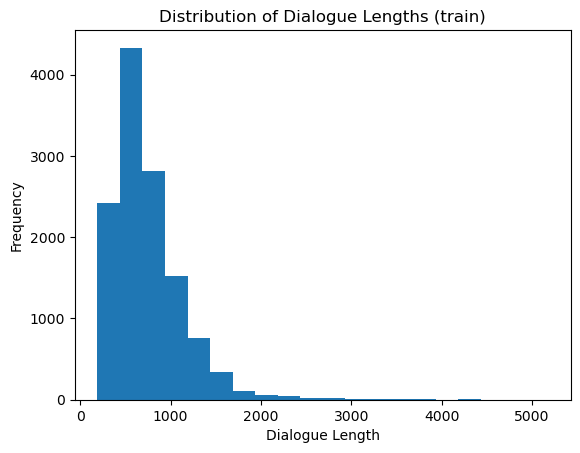

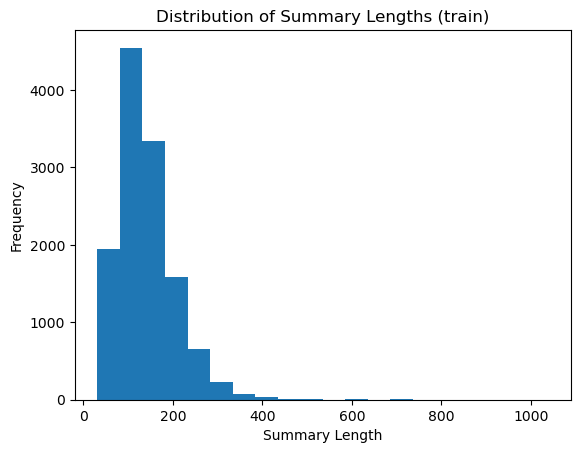

345
208


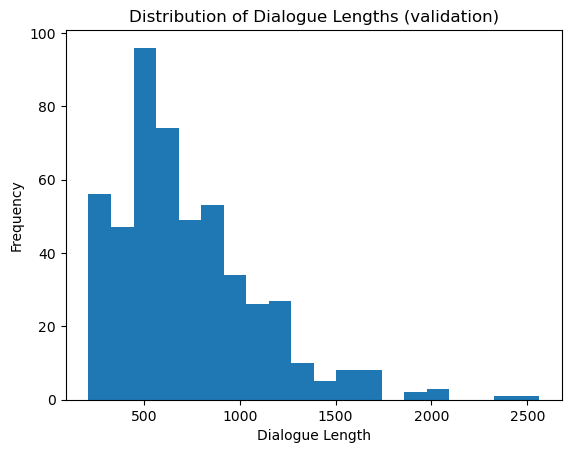

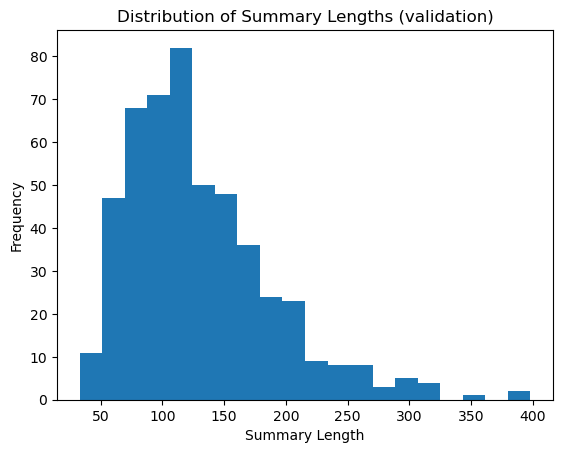

In [ ]:
train_dialogue = dataset["train"]["dialogue"]
train_summary = dataset["train"]["summary"]

val_dialogue = dataset["validation"]["dialogue"]
val_summary = dataset["validation"]["summary"]

print_histogram(train_dialogue, train_summary, 'train')
print_histogram(val_dialogue, val_summary, "validation")
